# Are Prestigious Universities Becoming More Selective?

### A recent article by The Hill found that a sample group of selective universities, where selective means more students apply than are offered admission, are becoming increasingly more selective.

#### The article can be found here:
https://thehill.com/changing-america/enrichment/education/3683426-elite-public-colleges-slash-acceptance-rates-raising-pressure-on-students/#:~:text=An%20analysis%20of%20enrollment%20data,tool%2C%20a%20mark%20of%20pedigree.

### Of the universities in the sample, Georgia Tech saw the largest dropoff, going from an admission rate of 59% in 2002 to 17% in 2022.

## Data Gathering

### As part of the US Census, universities submit data to the NCES (National Center for Education Statistics) who compile it and make it publically available through IPEDS (Integrated Post-Secondary Education Data System).

### Using their query tool, you extract to a CSV file application, admission, and enrollment counts for all the universities in the article.

In [24]:
import numpy as np
import pandas as pd
import pprint
import sqlite3 as db
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

df = pd.read_csv('C:/Users/dlyczak3/Desktop/Fall 2022/CSE 6040/Extra Credit/CSE 6040 Data.csv')
display(df)

,UnitID,Peer Group Status,Institution Name,Applicants total (ADM2021-2022),Admissions total (ADM2021-2022),Enrolled total (ADM2021-2022),Applicants total (IC2001-2002),Admissions total (IC2001-2002),Enrolled total (IC2001-2002)
0,139755,Target Institution,Georgia Institute of Technology-Main Campus,44048,7030,3453,9476,5157,2225
1,110662,Peer Group,University of California-Los Angeles,139489,15028,6584,40739,10953,4247
2,110635,Peer Group,University of California-Berkeley,112843,16295,6931,32963,8715,3703
3,243780,Peer Group,Purdue University-Main Campus,59436,40898,10278,21760,16727,6354
4,145637,Peer Group,University of Illinois Urbana-Champaign,47593,28395,8297,18805,12116,6179
5,110653,Comparison Group,University of California-Irvine,107950,31110,6489,29180,17248,3827
6,199120,Comparison Group,University of North Carolina at Chapel Hill,50729,10348,4690,16569,6088,3415
7,110680,Comparison Group,University of California-San Diego,118386,40493,7544,38187,16513,3981
8,110705,Comparison Group,University of California-Santa Barbara,105641,30824,4900,34022,17018,3649
9,234076,Comparison Group,University of Virginia-Main Campus,47971,9951,3889,14739,5534,2980


#### The data contains 17 universities (rows) with 9 columns. "Peer Group Status" is each universities' classification relative to Georgia Tech, with one of three possible values present: 
#### "Target Institute" refers to Georgia Tech 
#### "Peer Group" refers to the designated instititutions which have been identified as being most comparable objectively. 
#### "Comparison Group" are universities identified in The Hill article but who are not in Tech's peer group.

#### The subsequent 6 columns are the base data and provide aggregations of application counts, admission offer counts, and enrollment (attending) counts. 

In [25]:
# calculate change in application volume
df['% Applicant change'] = ((df['Applicants total (ADM2021-2022)'] - df['Applicants total (IC2001-2002)']) / df['Applicants total (IC2001-2002)'])
df['% Applicant change'] = df['% Applicant change'].apply(lambda x: round((x*100),2))

# calculate change in admission volume
df['% Admission change'] = ((df['Admissions total (ADM2021-2022)'] - df['Admissions total (IC2001-2002)']) / df['Admissions total (IC2001-2002)'])
df['% Admission change'] = df['% Admission change'].apply(lambda x: round((x*100),2))

# calculate change in enrollment volume
df['% Enrolled change'] = ((df['Enrolled total (ADM2021-2022)'] - df['Enrolled total (IC2001-2002)']) / df['Enrolled total (IC2001-2002)'])
df['% Enrolled change'] = df['% Enrolled change'].apply(lambda x: round((x*100),2))

In [15]:
## Let's check to see if everything looks right
display(data)

,UnitID,Peer Group Status,Institution Name,Applicants total (ADM2021-2022),Admissions total (ADM2021-2022),Enrolled total (ADM2021-2022),Applicants total (IC2001-2002),Admissions total (IC2001-2002),Enrolled total (IC2001-2002),% Applicant change,% Admission change,% Enrolled change
0,139755,Target Institution,Georgia Institute of Technology-Main Campus,44048,7030,3453,9476,5157,2225,364.84,36.32,55.19
1,110662,Peer Group,University of California-Los Angeles,139489,15028,6584,40739,10953,4247,242.40,37.20,55.03
2,110635,Peer Group,University of California-Berkeley,112843,16295,6931,32963,8715,3703,242.33,86.98,87.17
3,243780,Peer Group,Purdue University-Main Campus,59436,40898,10278,21760,16727,6354,173.14,144.50,61.76
4,145637,Peer Group,University of Illinois Urbana-Champaign,47593,28395,8297,18805,12116,6179,153.09,134.36,34.28
5,110653,Comparison Group,University of California-Irvine,107950,31110,6489,29180,17248,3827,269.95,80.37,69.56
6,199120,Comparison Group,University of North Carolina at Chapel Hill,50729,10348,4690,16569,6088,3415,206.17,69.97,37.34
7,110680,Comparison Group,University of California-San Diego,118386,40493,7544,38187,16513,3981,210.02,145.22,89.50
8,110705,Comparison Group,University of California-Santa Barbara,105641,30824,4900,34022,17018,3649,210.51,81.13,34.28
9,234076,Comparison Group,University of Virginia-Main Campus,47971,9951,3889,14739,5534,2980,225.47,79.82,30.50


### Top 5 Universities by Percent Change in Applicants

In [42]:
Application_changes = df[['Institution Name' , '% Applicant change']]
Application_changes.sort_values(by=['% Applicant change'] , ascending = False)[0:5]

,Institution Name,% Applicant change
0,Georgia Institute of Technology-Main Campus,364.84
16,Clemson University,311.19
5,University of California-Irvine,269.95
10,University of Georgia,258.16
14,Florida State University,255.66


### Top 5 Universities by Percent Change in Admission Offers

In [43]:
Admission_changes = df[['Institution Name' , '% Admission change']]
Admission_changes.sort_values(by=['% Admission change'] , ascending = False)[0:5]

,Institution Name,% Admission change
16,Clemson University,287.18
12,Binghamton University,167.30
11,University of California-Davis,165.82
7,University of California-San Diego,145.22
3,Purdue University-Main Campus,144.50


### Top 5 Universities by Percent Change in Enrollment

In [44]:
Enrolled_changes = df[['Institution Name' , '% Enrolled change']]
Enrolled_changes.sort_values(by=['% Enrolled change'] , ascending = False)[0:5]

,Institution Name,% Enrolled change
7,University of California-San Diego,89.50
2,University of California-Berkeley,87.17
16,Clemson University,80.54
11,University of California-Davis,73.64
5,University of California-Irvine,69.56


<AxesSubplot:title={'center':'Rates of Change AY2002 to AY2022'}, ylabel='Institution Name'>

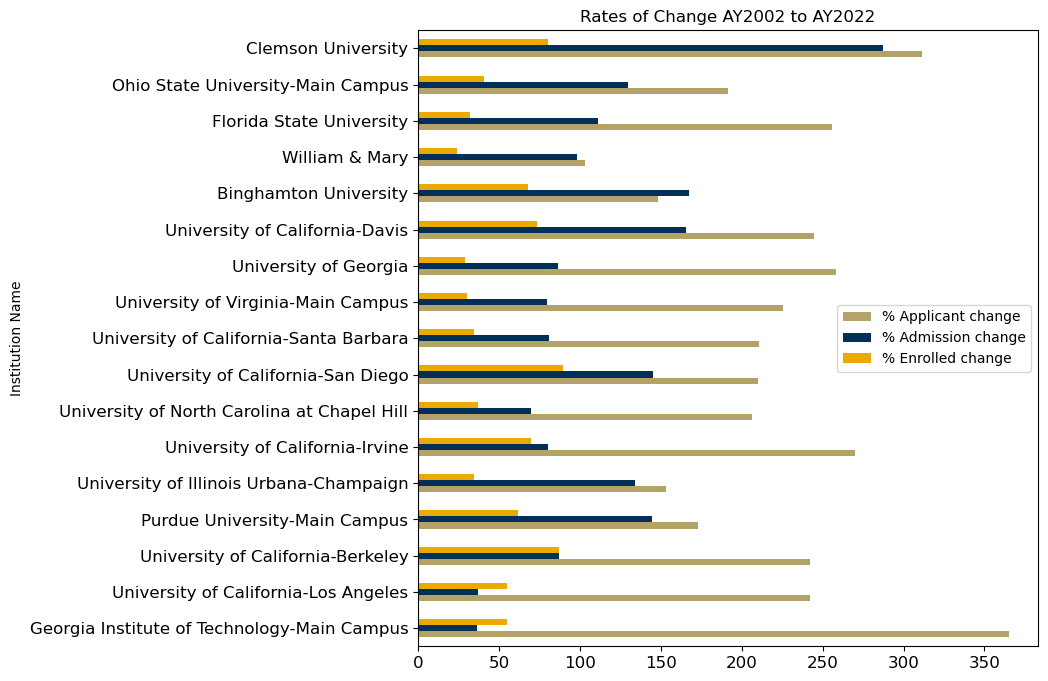

In [59]:
df.rename(columns={'Institution Name': "Institution_Name"},inplace=True)
data = df
x_value = 'Institution_Name'
y_value = ['% Applicant change' , '% Admission change' , '% Enrolled change']
y_color_1 = "#B3A369"
y_color_2 = "#003057"
y_color_3 = "#EAAA00"
title = 'Rates of Change AY2002 to AY2022'

data.plot.barh(x=x_value, xlabel = 'Institution Name', y= y_value , title=title, color = {'% Applicant change': y_color_1 , '% Admission change': y_color_2 , '% Enrolled change' : y_color_3} , fontsize = 12, figsize=(8,8))

Georgia Tech has had a massive growth in applications, but not as severe a growth in admission and enrollment. This is in stark contrast to all except for Tech and UCLA.

## Yield Rate
### Yield rate, the number / percent of students who, when offered admission, ultimately enroll. 

### Why are most universities seeing growing applications, growing admission changes, but shrinking (relative) enrollment rates?

#### The below cell will calculate yields:

In [57]:
# calculate AY2002 Yield Rate
df['AY2002 Yield Rate'] = df['Enrolled total (IC2001-2002)'] / df['Admissions total (IC2001-2002)']
df['AY2002 Yield Rate'] = df['AY2002 Yield Rate'].apply(lambda x: round((x*100),2))

# calculate AY2022 Yield Rate
df['AY2022 Yield Rate'] = (df['Enrolled total (ADM2021-2022)'] / df['Admissions total (ADM2021-2022)'])
df['AY2022 Yield Rate'] = df['AY2022 Yield Rate'].apply(lambda x: round((x*100),2))

# calculate Net Growth in Yield Rate
df['Net Change Yield Rate'] = (df['AY2022 Yield Rate'] - df['AY2002 Yield Rate'])

# calculate change in Yield Rate
df['Yield Rate change'] = (df['Net Change Yield Rate'] / df['AY2002 Yield Rate'])
df['Yield Rate change'] = df['Yield Rate change'].apply(lambda x: round((x*100),2))


<AxesSubplot:title={'center':'Yield Rate AY2002 vs AY2022'}, ylabel='Institution Name'>

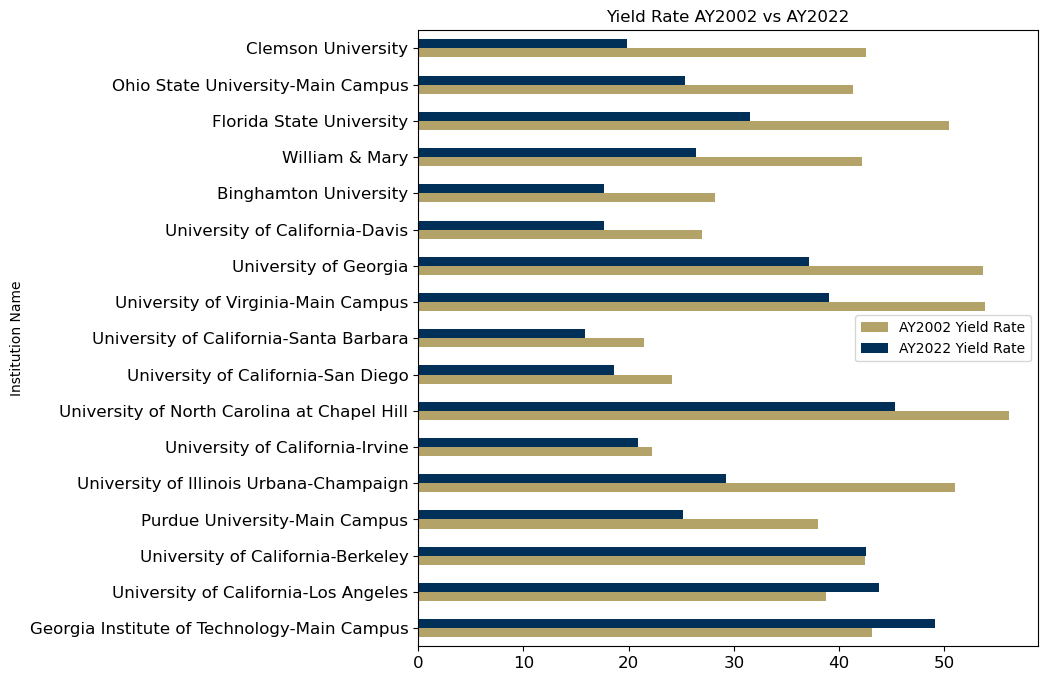

In [61]:
data = df
x_value = 'Institution_Name'
y_value = ['AY2002 Yield Rate' , 'AY2022 Yield Rate']
y_color_1 = "#B3A369"
y_color_2 = "#003057"
title = 'Yield Rate AY2002 vs AY2022'

data.plot.barh(x=x_value, xlabel = 'Institution Name', y= y_value , title=title, color = {'AY2002 Yield Rate': y_color_1 , 'AY2022 Yield Rate': y_color_2} , fontsize = 12, figsize=(8,8))

### Top 5 Universities by Yield Rate Change

In [63]:
Yield_changes = df[['Institution_Name' , 'Yield Rate change']]
Yield_changes.sort_values(by=['Yield Rate change'] , ascending = False)[0:5]

,Institution_Name,Yield Rate change
0,Georgia Institute of Technology-Main Campus,13.84
1,University of California-Los Angeles,13.00
2,University of California-Berkeley,0.09
5,University of California-Irvine,-5.99
6,University of North Carolina at Chapel Hill,-19.20


## Conclusion:
### The yield rate change for Georgia Tech and UCLA are the only schools to have a positive change (UCB is considered to have not changed).

### This finding indicates that it is less an issue of Georgia Tech becoming more selective (relative to its peers) and points more to overall changes in US University enrollment

### Further research to consider ...